# The dataset has 400 patients in it where the target class is the presence of chronic kidney disease.

https://www.kaggle.com/datasets/mansoordaku/ckdisease)
## Goal: Find predictive qualities of chronic kidney disease. Test and identify the best classifier for the job. 
### Methods: KNN, SelectKBest, DTC/RFC, and NB (Seaborns/Matplotlib used as necessary)

Data must be cleaned before ML. Keeping unclean rows in the data causes a considerable amount of problems. Clean data was also used for plotting to be consistent with the subset used for ML.  

# Import Cell

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree

# Reading in the data and checking for cleanliness

In [95]:
df = pd.read_csv("kidney_disease.csv")
print("[Before cleaning] There are {} patients in the chronic kidney disease database".format(len(df)))
df.head()

[Before cleaning] There are 400 patients in the chronic kidney disease database


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [96]:
# Checking for nans in the data.
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [97]:
# Checking the column names
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

# Data is dirty and also need to be encoded 

In [98]:
# Checking the data types in the df
print(df.dtypes)

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [99]:
# Checking the loop format to see if it will work for LabelEncoder()
for i in df.columns:
    print(df[i].dtype)

int64
float64
float64
float64
float64
float64
object
object
object
object
float64
float64
float64
float64
float64
float64
object
object
object
object
object
object
object
object
object
object


In [100]:
# Cleaning the data
df = df.dropna()
print("[After cleaning] There are {} patients in the chronic kidney disease database".format(len(df)))

[After cleaning] There are 158 patients in the chronic kidney disease database


In [101]:
# This was taken from Kaggle, I wanted to know what the variable abbreviations meant in context

df.rename(columns = {
'age' : 'age',
'bp' : 'blood pressure',
'sg' : 'specific gravity',
'al' : 'albumin',
'su' : 'sugar',
'rbc' : 'red blood cells',
'pc' : 'pus cell',
'pcc' : 'pus cell clumps',
'ba' : 'bacteria',
'bgr' : 'blood glucose random',
'bu' : 'blood urea',
'sc' : 'serum creatinine',
'sod' : 'sodium',
'pot' : 'potassium',
'hemo' : 'hemoglobin',
'pcv' : 'packed cell volume',
'wc' : 'white blood cell count',
'rc' : 'red blood cell count',
'htn' : 'hypertension',
'dm' : 'diabetes mellitus',
'cad' : 'coronary artery disease',
'appet' : 'appetite',
'pe' : 'pedal edema',
'ane' : 'anemia',
}, inplace = True)

In [102]:
# New column names
df.columns

Index(['id', 'age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'classification'],
      dtype='object')

# Plotting (Mostly Exploratory, but important plots have their own markdowns above them)

<Axes: xlabel='blood glucose random', ylabel='Count'>

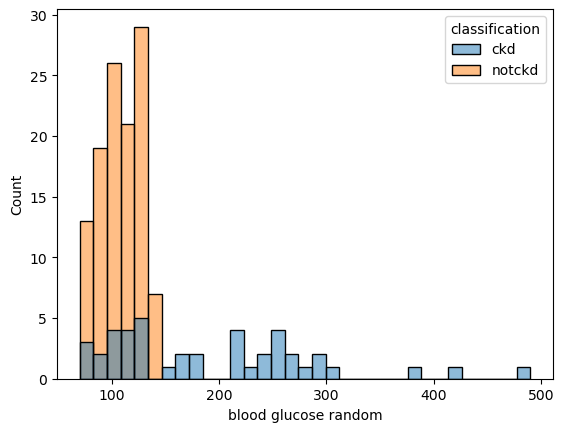

In [103]:
sns.histplot(x=df["blood glucose random"], hue=df["classification"])

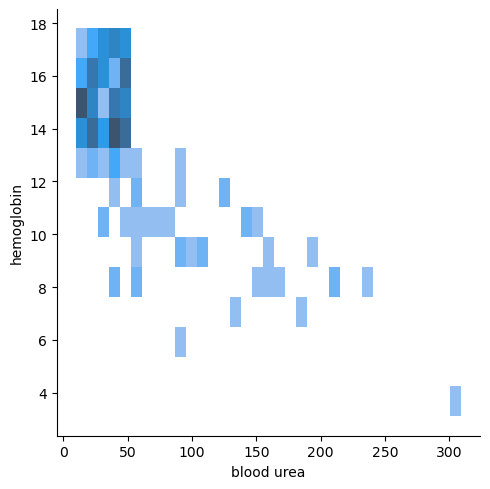

In [104]:
sns.displot(x=df["blood urea"], y=df["hemoglobin"], kind="hist")

Text(0.5, 1.0, 'Appetite/Hemoglobin and CKD Diagnosis')

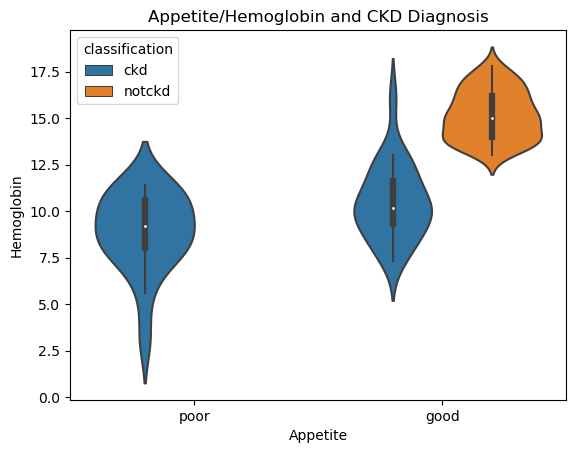

In [105]:
plt.figure()

ax = sns.violinplot(x=df["appetite"],y=df["hemoglobin"], hue=df["classification"])
ax.set_xlabel("Appetite")
ax.set_ylabel("Hemoglobin")
ax.set_title("Appetite/Hemoglobin and CKD Diagnosis")

<Axes: xlabel='hemoglobin', ylabel='blood urea'>

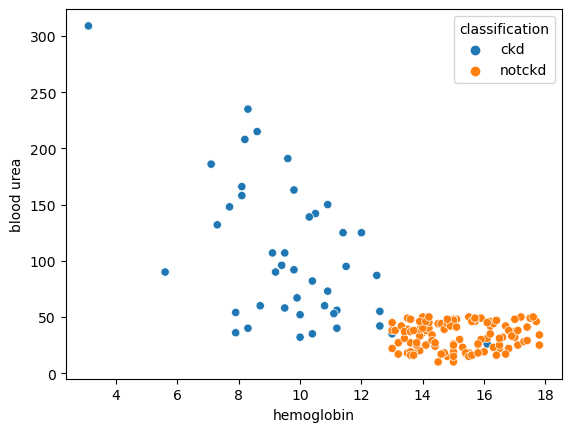

In [106]:
sns.scatterplot(x=df["hemoglobin"], y=df["blood urea"], hue=df["classification"])

# Shows the importance of albumin as a metric. Also shows hypertension is not a good of a classifier as SelectKBest implied.

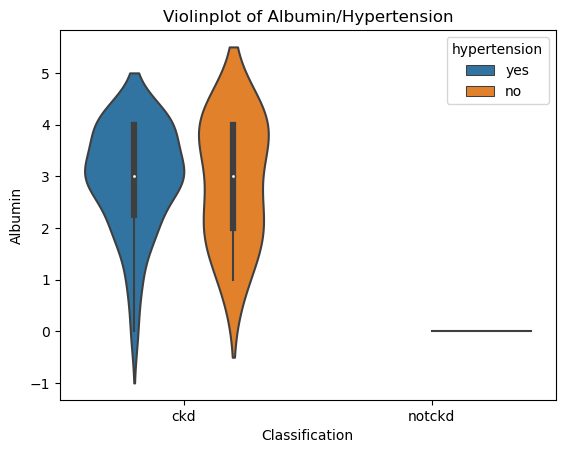

In [107]:

plt.figure()
ax = sns.violinplot(x=df["classification"], y=df["albumin"], hue=df["hypertension"])
ax.set_title("Violinplot of Albumin/Hypertension")
ax.set_xlabel("Classification")
ax.set_ylabel("Albumin")
#plt.savefig("Violinplot_Albumin_Hypertension.png")
plt.show()

# Shows the relevance of the blood glucose/urea with respect to classification

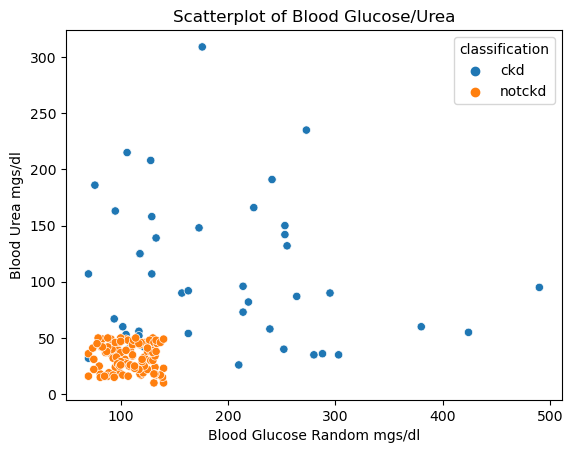

In [108]:
plt.figure()
ax=sns.scatterplot(x=df["blood glucose random"], y=df["blood urea"], hue=df["classification"])
#plt.xticks([0,16,32,48,64,82], ['0', '100', '200', '300','400','500'])
ax.set_title("Scatterplot of Blood Glucose/Urea")
ax.set_ylabel("Blood Urea mgs/dl")
ax.set_xlabel("Blood Glucose Random mgs/dl")
#plt.savefig("Scatterplot_Blood_Glucose_Urea.png")
plt.show()

Text(0.5, 0.98, 'Pedal Edema/Sodium and CKD Diagnosis')

<Figure size 640x480 with 0 Axes>

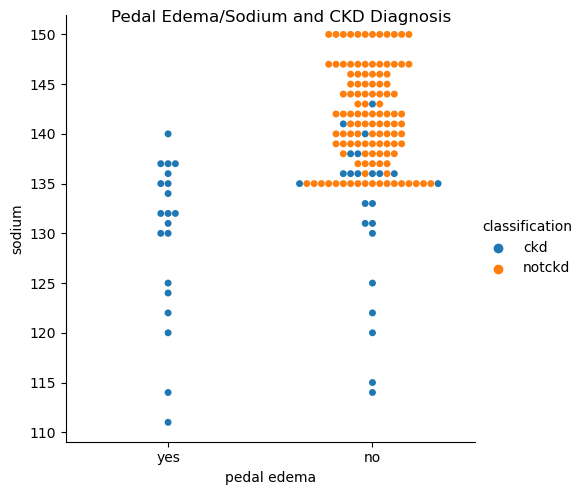

In [109]:
plt.figure()
ax = sns.catplot(x="pedal edema", y="sodium", hue="classification", data=df, kind="swarm", legend=True)
ax.fig.suptitle("Pedal Edema/Sodium and CKD Diagnosis")

<Axes: xlabel='hypertension', ylabel='blood urea'>

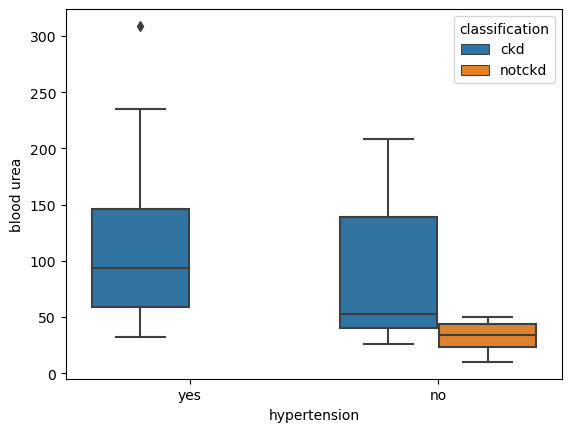

In [110]:
sns.boxplot(data=df, x=df["hypertension"], y=df["blood urea"], hue=df["classification"])

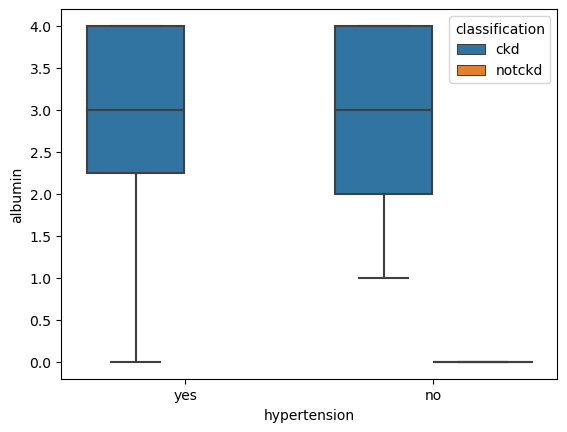

In [111]:
ax = sns.boxplot(x=df["hypertension"], y=df["albumin"], hue=df["classification"])

# Encoding the Data

In [112]:
# Original formatting
df["classification"].value_counts()

notckd    115
ckd        43
Name: classification, dtype: int64

In [113]:
le=LabelEncoder()

# Looping through and changing object data types (strings) into number formats to be correctly formatted for ML.
for i in df.columns:
    if (df[i].dtype)=='object':
        df[i]=le.fit_transform(df[i])
print(df.dtypes)

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells              int32
pus cell                     int32
pus cell clumps              int32
bacteria                     int32
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed cell volume           int32
white blood cell count       int32
red blood cell count         int32
hypertension                 int32
diabetes mellitus            int32
coronary artery disease      int32
appetite                     int32
pedal edema                  int32
anemia                       int32
classification               int32
dtype: object


In [114]:
# Encoding is successful
df["classification"].value_counts()

1    115
0     43
Name: classification, dtype: int64

In [115]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classification
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,11,42,14,1,0,0,1,1,1,0
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,8,11,12,1,1,0,1,0,1,0
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,11,25,13,1,1,0,1,1,0,0
14,14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,...,0,8,2,1,1,1,1,1,0,0
20,20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,...,4,63,7,1,1,1,1,1,1,0


In [116]:
# Checking the data type for formatting purposes
a = df.corr(method='pearson')
b = df.corr(method='spearman')
print(type(a), type(b))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


# Now data is formatted correctly for ML

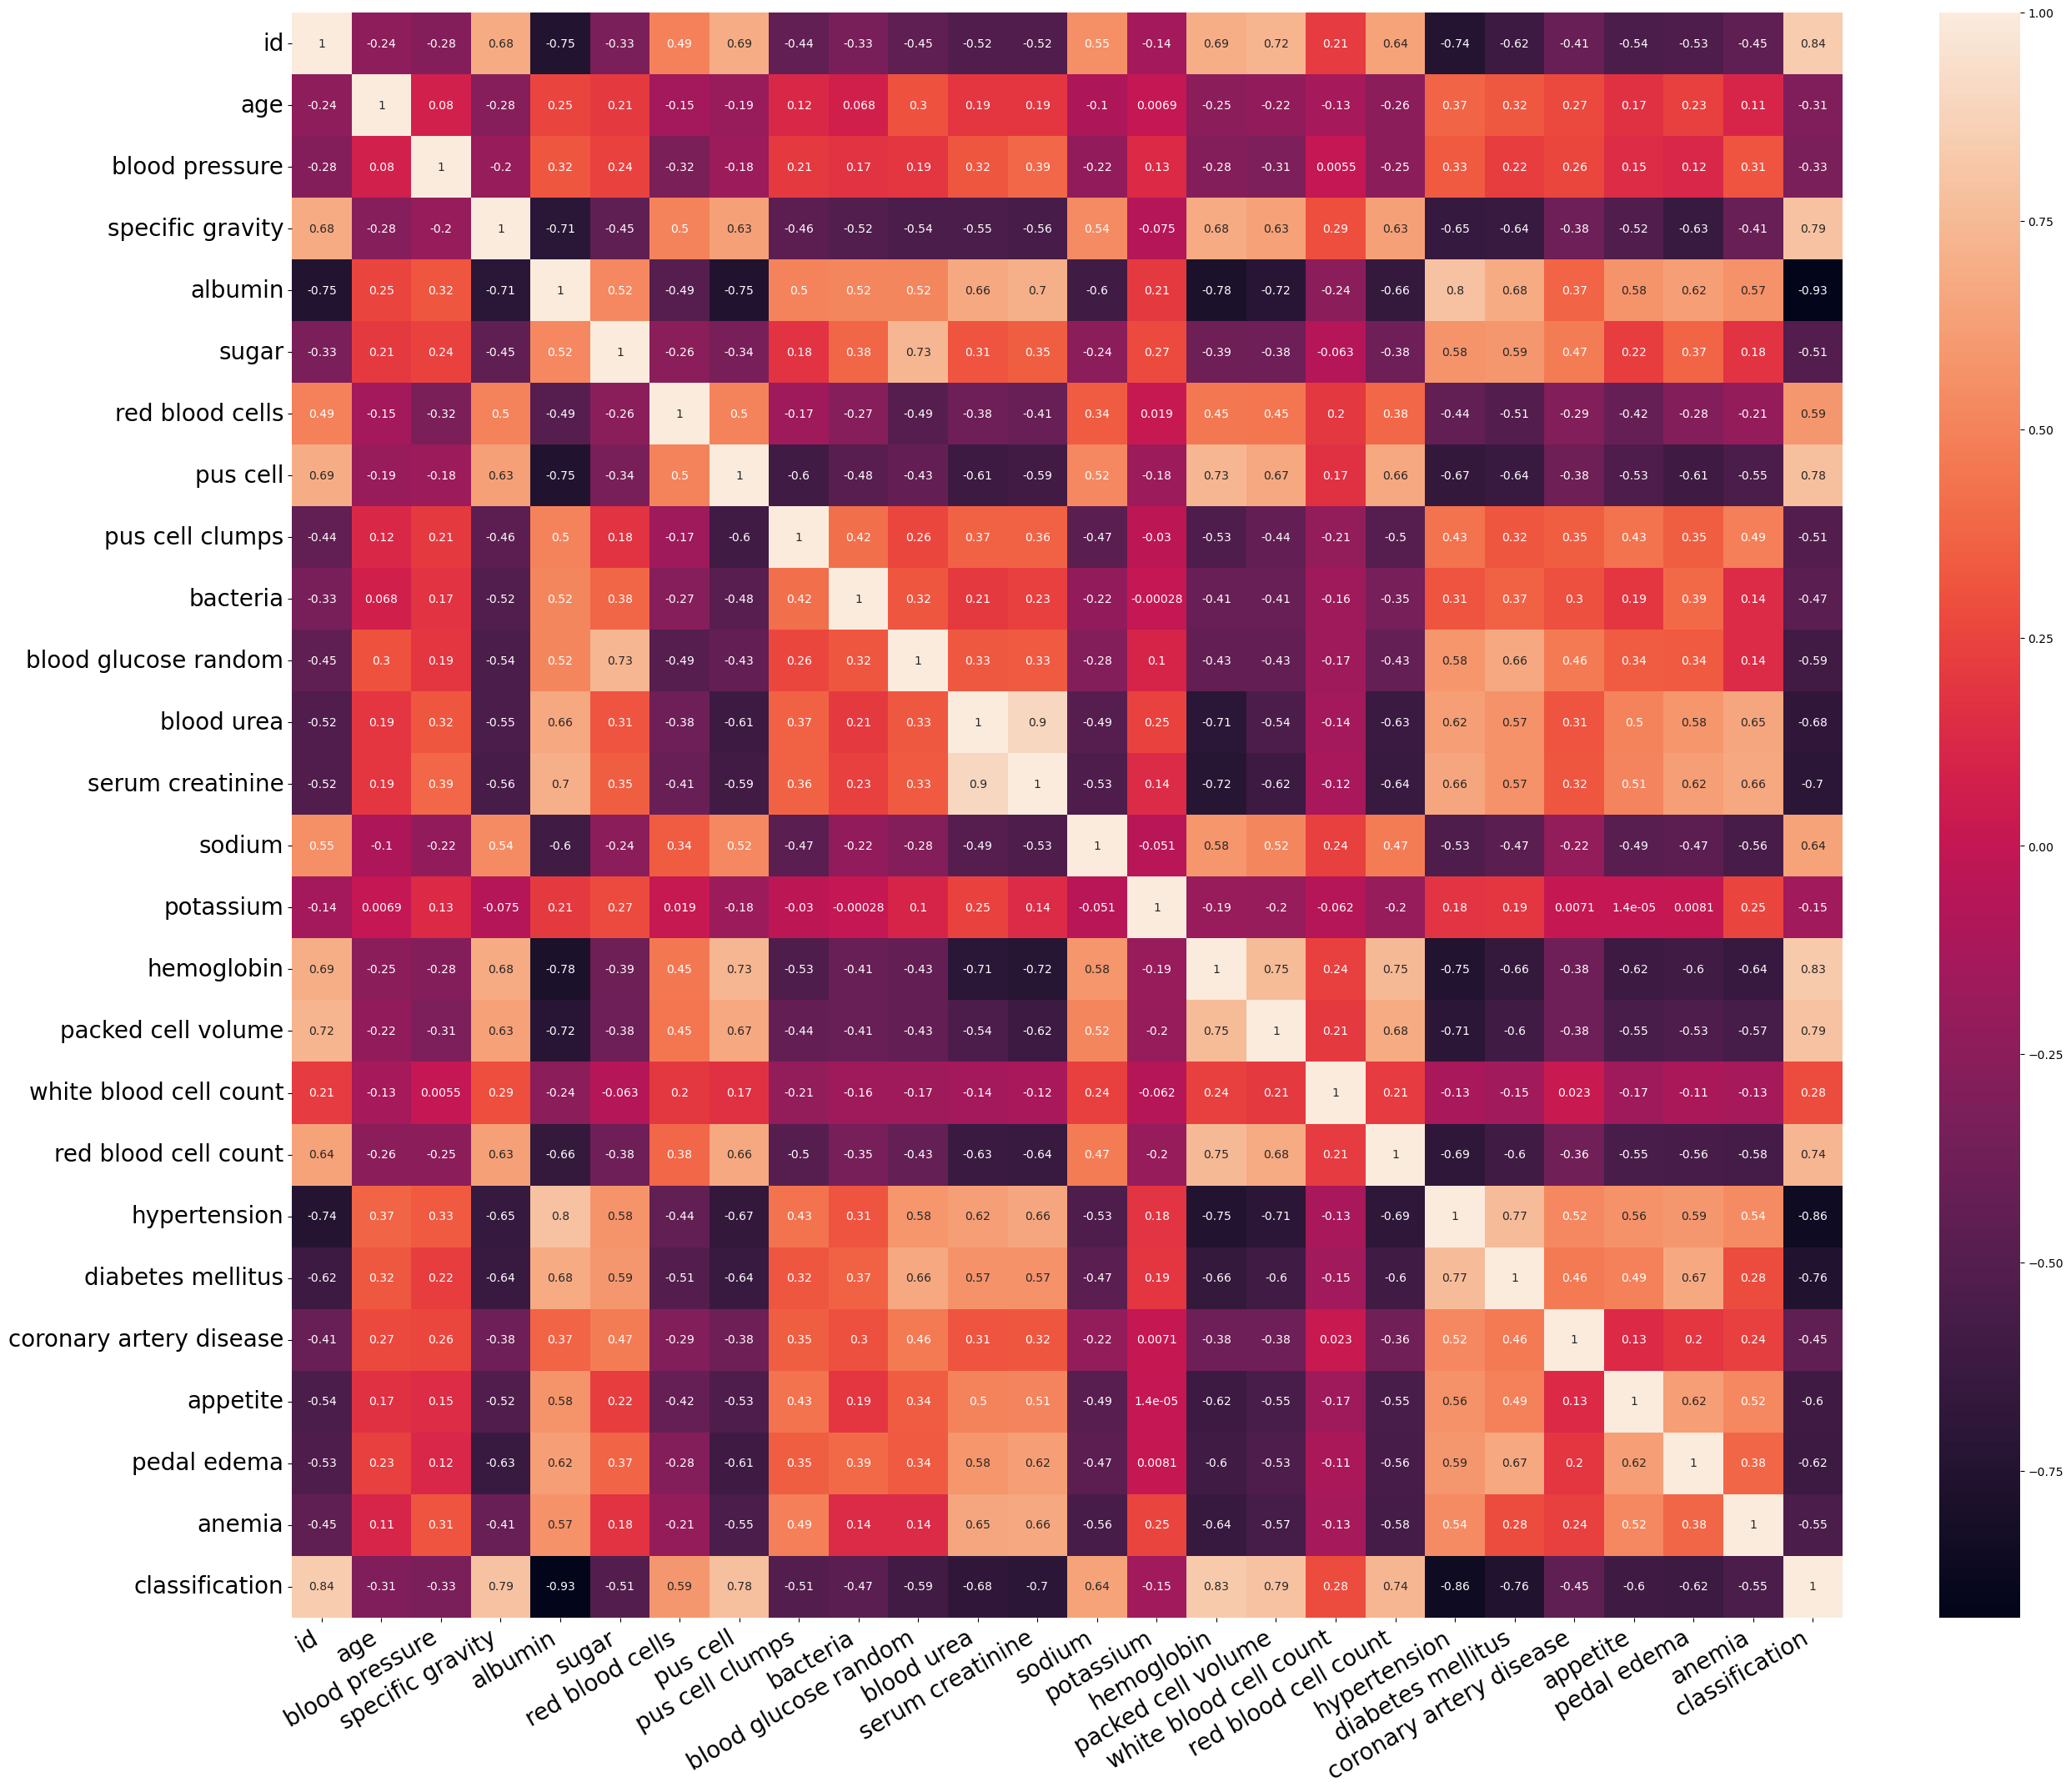

In [117]:
%matplotlib inline

# Line taken from Kaggle (formatting)
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))

# Making correlations of the data
correlation = df.corr()

#print(type(correlation))
sns.heatmap(correlation, annot=True)

# Next two lines from Kaggle (formatting)
plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [118]:
matrix = df.corr()

# Next line taken from Kaggle
matrix["classification"].sort_values(ascending=False)

classification             1.000000
id                         0.838812
hemoglobin                 0.833790
packed cell volume         0.794620
specific gravity           0.790102
pus cell                   0.775388
red blood cell count       0.736367
sodium                     0.640902
red blood cells            0.586391
white blood cell count     0.284359
potassium                 -0.153565
age                       -0.305119
blood pressure            -0.326567
coronary artery disease   -0.447355
bacteria                  -0.468845
pus cell clumps           -0.509915
sugar                     -0.510615
anemia                    -0.548947
blood glucose random      -0.591217
appetite                  -0.604622
pedal edema               -0.622573
blood urea                -0.677611
serum creatinine          -0.702206
diabetes mellitus         -0.758965
hypertension              -0.856334
albumin                   -0.925816
Name: classification, dtype: float64

# Sub portions of the heatmap if desired

In [119]:
plt.figure()

# Using iloc to "grab" specific sections of the heatmap
top_left=correlation.iloc[1:12,1:12]
top_right=correlation.iloc[1:12,13:26]
bot_left=correlation.iloc[13:26,1:12]
bot_right=correlation.iloc[13:26,13:26]

<Figure size 640x480 with 0 Axes>

<Axes: >

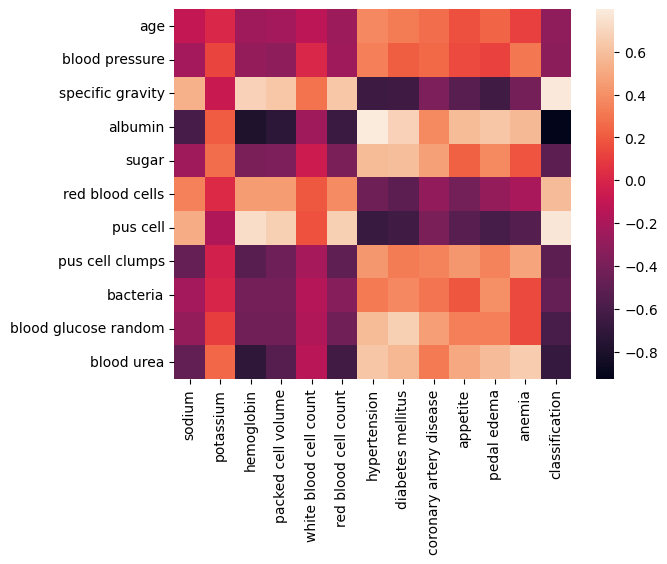

In [120]:
sns.heatmap(top_right)

# No-Frills KNN

In [121]:
# Creating the training and testing split
x_train, x_test, y_train, y_test = train_test_split(df[['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia']], df['classification'], test_size=0.3)

# Specifiying the classifier
classifier=KNN(n_neighbors=5)

# Fitting the training data
classifier.fit(x_train, y_train)

# Predicting based on the testing data
prediction=classifier.predict(x_test)

correct = np.where(prediction == y_test, 1, 0).sum()
print(correct)

# Printing the accuracy of KNN
accuracy = 100*correct/len(y_test)
print("The accuracy of this prediction is {0:.3f}%".format(accuracy))                                                   

43
The accuracy of this prediction is 89.583%


# Adding Cross Validation and MinMaxScaling

In [122]:
X = df[['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia']]
Y=df["classification"]

In [123]:
# Applying MMS
X_transformed=MMS().fit_transform(X)
estimator=KNN()

# Using cross_val_score instead of train_test_split
transformed_scores=cross_val_score(estimator, X_transformed, Y, scoring='accuracy')
# Printing the accuracy
answer=(np.mean(transformed_scores)*100)
print("The accuracy of KNN (with cross validation and scaling) is {0:.3f}%".format(answer))

The accuracy of KNN (with cross validation and scaling) is 96.230%


# Testing various numbers of nearest neighbors and their impact on accuracy (4 nearest neighbors produce the best results).

In [124]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21)) # Include 20
# Varying the number of neighbors
for n_neighbors in parameter_values:
    estimator = KNN(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    # Appending the scores to the lists
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

# Creating the plot of the # of neighbors vs scores

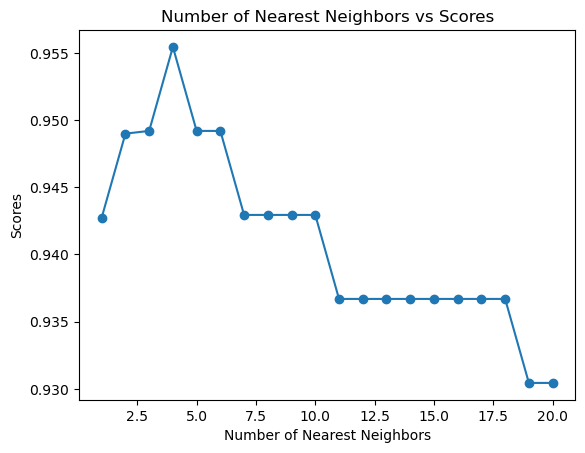

In [125]:
plt.figure()
plt.plot(parameter_values, avg_scores, '-o')
plt.ylabel('Scores')
plt.xlabel('Number of Nearest Neighbors')
plt.title("Number of Nearest Neighbors vs Scores")
#plt.savefig("KNN_vs_Scores.png")
plt.show()

# DTC and RFC (with MMS)

In [126]:
# Defining the classifier
clf_dtc=DTC(random_state=14)
# Performing cross validation, reading in the training data, target array, and scoring metric
scores_dtc = cross_val_score(clf_dtc, X_transformed, Y, scoring='accuracy')
print("Decision Tree Accuracy: {0:.3f}%".format(np.mean(scores_dtc)*100))

# Defining the classifier
clf_rfc=RFC()
# Performing cross validation, reading in the training data, target array, and scoring metric
scores_rfc = cross_val_score(clf_rfc, X_transformed, Y, scoring='accuracy')
print("Random Forest Accuracy: {0:.3f}%".format(np.mean(scores_rfc)*100))

Decision Tree Accuracy: 98.125%
Random Forest Accuracy: 100.000%


# Super Cool Tree Plot

In [127]:
# Defining the classifier
clf=DTC(random_state=14)
# Fitting the data to the classifier
clf.fit(X_transformed, Y)

DecisionTreeClassifier(random_state=14)

In [128]:
#print(sklearn.__version__)
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


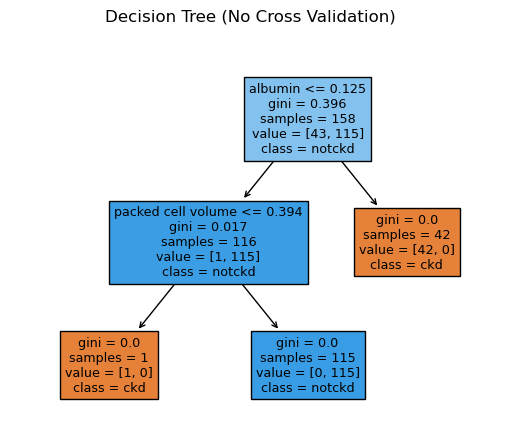

In [129]:
plt.figure()
# Adding a title
plt.suptitle("Decision Tree (No Cross Validation)")
# Making the tree plot
plot_tree(clf,feature_names=['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia'], class_names=['ckd','notckd'],filled=True)
#plt.savefig("Decision_Tree_Example.png")
plt.show()

# SelectKBest

## Testing Variance

In [130]:
vt = VarianceThreshold()
# Applying the VarianceThreshold() transformer
Xt = vt.fit_transform(df)
b = (vt.variances_)
print(b)

[3.96000000e+02 7.70000000e+01 6.00000000e+01 3.00472681e-05
 1.98429739e+00 6.57426694e-01 1.00945361e-01 1.49855792e-01
 8.07562891e-02 7.01810607e-02 4.20000000e+02 2.99000000e+02
 9.41176895e+00 3.90000000e+01 1.20085259e+01 8.25452331e+00
 3.30000000e+01 7.00000000e+01 4.00000000e+01 1.68883192e-01
 1.45809966e-01 6.47732735e-02 1.05792341e-01 1.10559205e-01
 9.10110559e-02 1.98085243e-01]


# They all have variance #Hooray

In [131]:
# Specifying the transformer, scoring metric, and # of columns I want returned
transformer=SelectKBest(score_func=chi2, k=3)

chi2_predict_no_scale= transformer.fit_transform(X,Y)

## No Scaling (SelectKBest)

In [132]:
v = transformer.scores_
# Printing the column index and the scores for that column
for i,j in enumerate(v):
    print(i,j)
#v.sort()
#print(v[::-1])

0 70.96220192000906
1 28.238424377554807
2 0.0029059061366729405
3 336.97674418604646
4 106.97674418604649
5 6.18936877076412
6 17.435550748152156
7 37.44186046511628
8 32.093023255813954
9 1762.030281009375
10 3079.9595605835366
11 335.0349349846577
12 26.051893501504104
13 9.649921663551591
14 66.24347111671464
15 319.45300483783154
16 129.9033797843096
17 329.0972933606837
18 90.93023255813954
19 74.88372093023256
20 29.418604651162788
21 50.81395348837209
22 53.488372093023244
23 42.790697674418595


In [133]:
# The 3rd, 9th, and 10th columns have the highest scores
# Albumin, Blood Glucose, and Blood Urea
print("And the answer is...")
print("Albumin: {}".format(v[3]))
print("Blood Glucose: {}".format(v[9]))
print("Blood Urea: {}".format(v[10]))
answer=np.sort(v)
print(answer[-3:])

And the answer is...
Albumin: 336.97674418604646
Blood Glucose: 1762.030281009375
Blood Urea: 3079.9595605835366
[ 336.97674419 1762.03028101 3079.95956058]


# Albumin (336), Blood Glucose (1762), and Blood Urea (3079) are the best indicators of chronic kidney disease (without scaling)

# Add MMS to SelectKBest

In [134]:
chi2_predict_with_scale= transformer.fit_transform(X_transformed,Y)

In [135]:
t=transformer.scores_
# Printing the column index and the scores for that column
for n,m in enumerate(t):
    print(n,m)
#t.sort()
#print(t[::-1])

0 1.048517811124324
1 1.4490770404271558
2 9.962930103478602
3 84.24418604651162
4 21.395348837209298
5 6.18936877076412
6 17.435550748152156
7 37.44186046511628
8 32.093023255813954
9 8.982777251613157
10 12.720278173052654
11 27.70009193533373
12 3.330573657552427
13 0.47057435238284134
14 5.8258315780380086
15 9.68039408599489
16 1.8557625683472796
17 8.227432334017095
18 90.93023255813954
19 74.88372093023256
20 29.418604651162788
21 50.81395348837209
22 53.488372093023244
23 42.790697674418595


In [136]:
# The best columns (in order) are 19, 3, 18
jk=np.sort(t)
print(jk[-3:])

print("Diabetes Mellitus {:.3f}".format(t[19]))
print("Albumin: {:.3f}".format(t[3]))
print("Hypertension: {:.3f}".format(t[18]))

[74.88372093 84.24418605 90.93023256]
Diabetes Mellitus 74.884
Albumin: 84.244
Hypertension: 90.930


## After MMS Results Change: Diabetes Mellitus (74), Albumin (84), Hypertension (90)

# Naive Bayes (with MMS)

In [137]:
# Setting up the pipeline and calling the classifier
pipeline = Pipeline([('naive-bayes',BernoulliNB())])

# Using cross validation, read in the training data, the target array, and the scoring metric
scores = cross_val_score(pipeline, X_transformed, Y, scoring='f1')
print("The Naive Bayes classifier has an accuracy of {0:.3f}%".format(np.mean(scores)*100))

The Naive Bayes classifier has an accuracy of 99.574%


# The End